In [8]:
from numpy import genfromtxt
import numpy as np
X_Train = genfromtxt('hw1-data/X_train.csv', delimiter=',')
Y_Train = genfromtxt('hw1-data/Y_train.csv', delimiter=',')
X_Test = genfromtxt('hw1-data/X_test.csv', delimiter=',')
Y_Test = genfromtxt('hw1-data/Y_test.csv', delimiter=',')

In [9]:
X_Train.shape[0]
#wrr = np.array([]).reshape(0,X_Train.shape[1])
#wrr

350

In [10]:
import numpy as np
from numpy.linalg import inv
def compute_w_df(X_Tr,alpha):
    wrr = np.array([]).reshape(0,X_Tr.shape[1])
    df=[]
    prod1=np.dot(X_Tr.T,X_Tr)
    prod3=np.dot(X_Tr.T,Y_Train)
    U, s, V = np.linalg.svd(X_Tr, full_matrices=True)
    S = np.diag(s)
    S_2=S*S
    for lamda in range(0,alpha):
        prod2=lamda*np.identity(X_Tr.shape[1])
        sum1=np.add(prod2,prod1)
        inv1=inv(sum1)
        prod4=np.dot(inv1,prod3)
        wrr = np.append(wrr,[prod4],axis=0)
        d1=(S_2/(lamda+S_2))
        d2=np.sum(d1)
        df.append(d2)
    df=np.array(df)
    return df,wrr  

In [11]:
(df1,wrr1)=compute_w_df(X_Train,5001)

/Users/wenbo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


In [12]:
print(wrr1[:,0])

[-0.45626139 -0.44572373 -0.44130977 ..., -0.32576685 -0.32571669
 -0.32566654]


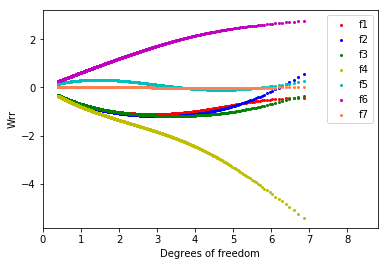

In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# plt.figure(figsize=(5001,7))
# for i in range(0,7):
plt.scatter(df1,wrr1[:,0],label="f1",marker='o',color='r',s = 4)
plt.scatter(df1,wrr1[:,1],label="f2",marker='o',color='b',s = 4)
plt.scatter(df1,wrr1[:,2],label="f3",marker='o',color='g',s = 4)
plt.scatter(df1,wrr1[:,3],label="f4",marker='o',color='y',s = 4)
plt.scatter(df1,wrr1[:,4],label="f5",marker='o',color='c',s = 4)
plt.scatter(df1,wrr1[:,5],label="f6",marker='o',color='m',s = 4)
plt.scatter(df1,wrr1[:,6],label="f7",marker='o',color='coral',s = 4)
# y label
plt.ylabel('Wrr')
# x label
plt.xlabel('Degrees of freedom')
# set the figure boundaries
plt.xlim([0, 8.8])
# and a legend
plt.legend(loc='upper right')

plt.show()

In [28]:
def rmse(a,X_Te,wrr1):
    rmse = []
    for i in range(0,a):
        y=np.dot(X_Te,wrr1[i])
        print(np.shape(y))
        val=(Y_Test-y)*(Y_Test-y)
        val2=np.sqrt(sum(val)/42.0)
        rmse.append(val2)
    rmse=np.array(rmse)
    lam=np.arange(a)
    return rmse,lam

In [29]:
l1 = np.arange(51)
l1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [30]:
r1,l1=rmse(51,X_Test,wrr1)

(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)
(42,)


In [31]:
def poly2(Xmat):
    X_tr=Xmat
    np.shape(X_tr)
    for i in range(0,6):
        pr=np.square(X_tr[:,i])
        X_tr=np.column_stack([X_tr,pr])
    return X_tr

In [32]:
def poly3(Xmat):
    X_tr=Xmat
    np.shape(X_tr)
    for i in range(0,6):
        pr=np.power(X_tr[:,i],3)
        X_tr=np.column_stack([X_tr,pr])
    return X_tr

In [38]:
X_tr2=poly2(X_Train)
X_te2=poly2(X_Test)
X_tr3=poly3(X_tr2)
X_te3=poly3(X_te2)
X_tr3[0]

array([ 0.30957   , -0.36707   ,  0.45545   , -0.20083   , -0.73992   ,
       -0.80885   ,  1.        ,  0.09583358,  0.13474038,  0.2074347 ,
        0.04033269,  0.54748161,  0.65423832,  0.0296672 , -0.04945915,
        0.09447614, -0.00810001, -0.40509259, -0.52918067])